## Heart Attack Analysis & Perdiction & My Practice

### What will you learn from this project?
* EDA
* Missing Value Analysis
* Categoric and Numaric Features
* Normalization
* Cat - Correlation Plot Analysis
* Outlier Detection ('1.5')
* Modelling and Tuning Machine Learnin Model

### Introduction
* A heart attack, also called a myocardial infarction, happens when a part of the heart muscle doesn't get enough blood.
* The more time that passes without treatment to restore blood flow, the greater the damage to the heart muscle.
* Coronary artery disease (CAD) is the main cause of heart attack.

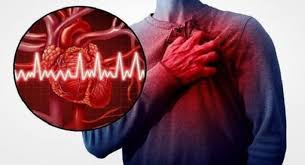

## Analysis Content
1. [Python Libraries](#1)
1. [Data Content](#2)
1. [Read and Analysis](#3)
1. [Missing Value Analysis](#4)
1. [Unique Value Analysis](#5)
1. [Categorical Feature Analysis](#6)

<a id=1></a>
## Python Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve

import warnings
warnings.filterwarnings("ignore")

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


<a id=2></a>
## Data Content

* Age : Age of the patient
* Sex : Sex of the patient
* exang: exercise induced angina (1 = yes; 0 = no)
* ca: number of major vessels (0-3)
* cp : Chest Pain type chest pain type
  * Value 1: typical angina
  * Value 2: atypical angina
  * Value 3: non-anginal pain
  * Value 4: asymptomatic
* trtbps : resting blood pressure (in mm Hg)
* chol : cholestoral in mg/dl fetched via BMI sensor
* fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* rest_ecg : resting electrocardiographic results
  * Value 0: normal
  * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach : maximum heart rate achieved
* target : 0= less chance of heart attack 1= more chance of heart attack

<a id=3></a>
## Read & Analysis

In [2]:
df = pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<a id=4></a>
## Missing Value Analysis

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

<a id=5></a>
## Unique Value Analysis

In [7]:
df['sex'].value_counts().shape[0]

2

In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [9]:
for i in list(df.columns):
    print("{} -- {}".format(i,df[i].value_counts().shape[0]))

age -- 41
sex -- 2
cp -- 4
trtbps -- 49
chol -- 152
fbs -- 2
restecg -- 3
thalachh -- 91
exng -- 2
oldpeak -- 40
slp -- 3
caa -- 5
thall -- 4
output -- 2


<a id=6></a>
## Categorical Feature Analysis

In [12]:
categorical_list=["sex","cp","fbs","chol","restecg","exng","slp","caa","thall","output"]

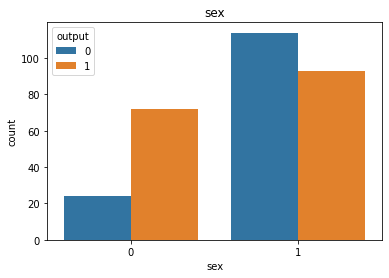

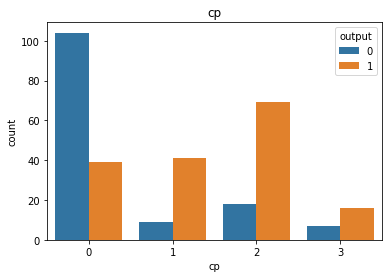

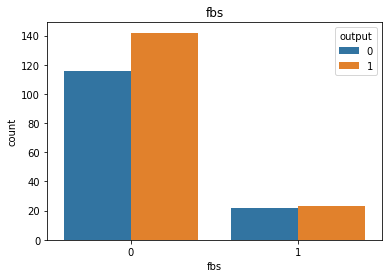

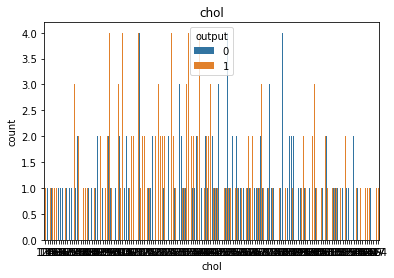

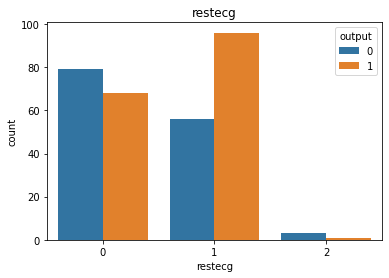

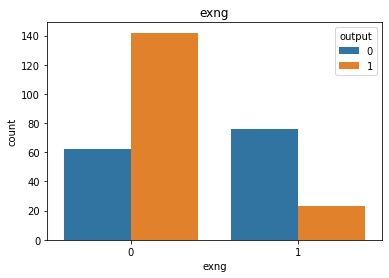

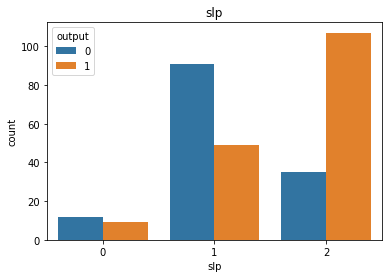

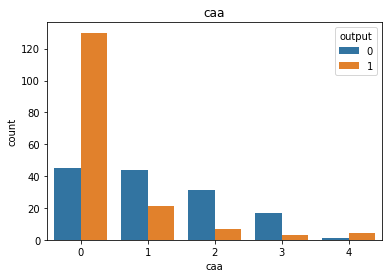

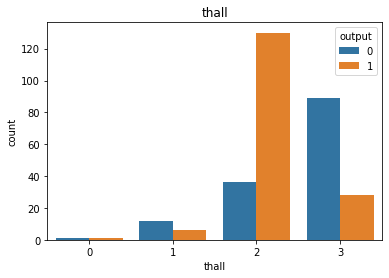

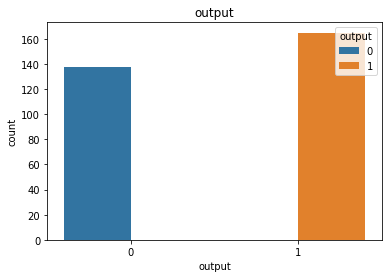

In [13]:
df_categoric= df.loc[:,categorical_list]
for i in categorical_list:
    plt.figure()
    sns.countplot(x=i,data=df_categoric,hue="output")
    plt.title(i)
